In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
#f = pd.DataFrame([name, attention, WA, UA], columns=['mode', 'emo attn', 'WA', 'UA'], sim=1)

In [13]:
df = {
    'mode': ['α=1.0\nβ=0.0'] + ['α=1.0\nβ=0.5', 'α=1.0\nβ=1.0', 'α=1.0\nβ=1.5'] * 2, 
    'state':['freeze', \
             'finetune (arcface)','finetune (arcface)','finetune (arcface)', \
             'finetune (all)', 'finetune (all)', 'finetune (all)'], 

    'WA(%)':[72.14, \
             70.11, 70.72, 70.84,\
             71.18, 70.93, 70.58],
   
    'UA(%)':[72.97, \
             71.51, 71.53, 71.92,\
             72.08, 71.73, 71.26],
}

adf = pd.DataFrame(df)

In [14]:
aadf = pd.melt(adf, id_vars=['mode', 'state'], var_name="source", value_name="value_numbers")
aadf

,mode,state,source,value_numbers
0,α=1.0\nβ=0.0,freeze,WA(%),72.14
1,α=1.0\nβ=0.5,finetune (arcface),WA(%),70.11
2,α=1.0\nβ=1.0,finetune (arcface),WA(%),70.72
3,α=1.0\nβ=1.5,finetune (arcface),WA(%),70.84
4,α=1.0\nβ=0.5,finetune (all),WA(%),71.18
5,α=1.0\nβ=1.0,finetune (all),WA(%),70.93
6,α=1.0\nβ=1.5,finetune (all),WA(%),70.58
7,α=1.0\nβ=0.0,freeze,UA(%),72.97
8,α=1.0\nβ=0.5,finetune (arcface),UA(%),71.51
9,α=1.0\nβ=1.0,finetune (arcface),UA(%),71.53


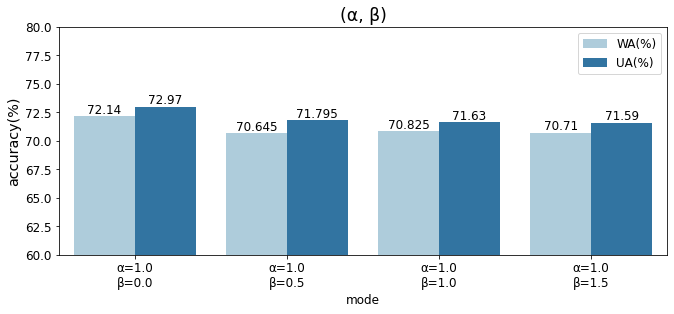

In [15]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         }
plt.rcParams.update(params)

plt.figure(figsize=(10, 5))
y = sns.barplot(x='mode', y='value_numbers', hue='source', data=aadf,
                    palette=sns.color_palette("Paired"), ci=False)
plt.ylim(60, 80)
y.bar_label(y.containers[0], fontsize='large')
y.bar_label(y.containers[1], fontsize='large')
y.set_title('(α, β)', fontsize='xx-large')
y.set_ylabel('accuracy(%)', fontsize='x-large')
plt.legend()
#y.set_xlabel('(a)', fontsize='xx-large')

plt.tight_layout(pad=3)
plt.show()

In [16]:
aadf = aadf.replace('finetune (arcface)', 'Arcface Fine-Tuned')
aadf = aadf.replace('finetune (all)', 'All Fine-Tuned')
aadf = aadf.replace('freeze', 'All Frozen')

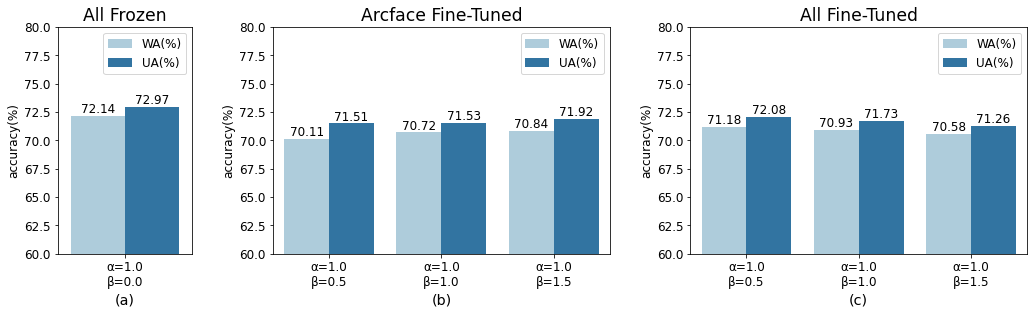

In [17]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         }
plt.rcParams.update(params)

fig, ax = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [0.8, 2, 2]})
#plt.figure(figsize=(10, 5))
for i_idx, i in enumerate(['All Frozen', 'Arcface Fine-Tuned', 'All Fine-Tuned']):
    y = sns.barplot(x='mode', y='value_numbers', hue='source', data=aadf[aadf['state'] == i],
                        palette=sns.color_palette("Paired"), ci=False, ax=ax[i_idx])
    ax[i_idx].set_ylim(60, 80)
    y.bar_label(y.containers[0], fontsize='large')
    y.bar_label(y.containers[1], fontsize='large')
    y.set_xlabel('('+chr(97+i_idx)+')', fontsize='x-large')
    #y.set_xticts('=', fontsize='large')
    y.set_ylabel('accuracy(%)', fontsize='large')
    y.set_title(i, fontsize='xx-large')
    ax[i_idx].legend()
    #y.set_xlabel('(a)', fontsize='xx-large')

plt.tight_layout(pad=3)
plt.show()